<a href="https://colab.research.google.com/github/juhwano/crawling/blob/main/Crawling_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 워드 클라우드 설치

In [ ]:
pip install WordCloud konlpy

### 필요한 패키지 불러오기

In [ ]:
# 워드클라우드
from wordcloud import WordCloud
# 데이터 시각화
import matplotlib.pyplot as plt
# 웹 데이터 수집 및 처리(크롤링)
from bs4 import BeautifulSoup as bs
import urllib.request as ur
import requests
# 데이터 조작
import pandas as pd
import numpy as np
# 화면 흐림 retina 설정
%config InlineBackend.figure_format = 'retina'
# 구글 드라이브 mount
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# matplotlib 한글 오류 처리
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치 완료 확인
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
# 폰트 종류 출력
[f for f in sys_font if 'Nanum' in f]

# 한글 폰트 적용
path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothicCoding


### 뉴스기사 제목을 크롤링하고, 워드클라우드로 시각화하기

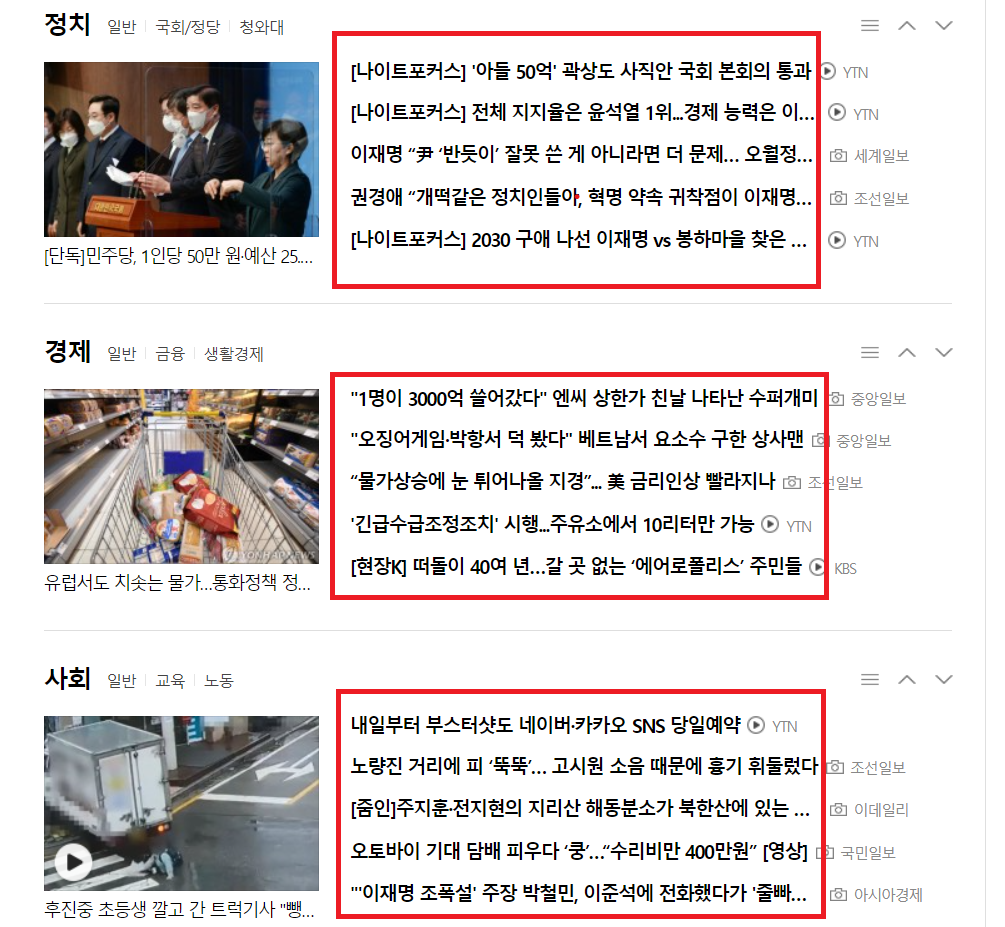

“이재명, 아내 김혜경 손 꼭 잡고 갔다”… 與 사고 당시 CCTV 공개 (종합)
“빨치산에 의한 학살이 국군 만행으로 둔갑”
‘아들이 화천대유서 50억’ 곽상도 의원직 상실
중도-진보 표심 잡기 나선 윤석열 “DJ-盧 통합정신 배우겠다”
이재명측 “대선前 대장동 특검 가능”… 野 “당장 만나 처리하자”
돈풀기의 역습… 전세계가 물가 쇼크
[WEEKLY BIZ] ‘돈풀기 공동전선’ 균열… 중앙은행들이 갈라진다
[정충진의 경매 따라잡기]재건축매물 경매, 조합원자격 꼭 확인해야
디즈니플러스 한국 상륙… LGU+, 오늘부터 독점 서비스
삼바 “의약품 위탁생산력 초격차… 세계 물량 과반이 목표”
[힘찬 관절로 행복찾기]스트레칭만 잘해도 골프엘보 막을수 있어요
[신문과 놀자!/주니어를 위한 칼럼 따라잡기] 먹는 코로나 치료제
머스크, 자신의 테슬라 주식 3% 팔아 6조원 현금화… 세금 회피 의도 분석
[단독]정영학, 본인회사와 아파트 거래로 비자금 최소 31억 조성
정은경 “방역완화 폭 컸다… 다시 강화할수도” 위드코로나 빨간불
[가정예배 365-11월 12일] 가치관의 변화가 주는 힘
“한국어 기원은 9000년전 요하 일대 농민”
[저자와의 만남-김태훈 선교사] 억대 연봉에 안정된 의사생활 접고 왜 에티오피아에… “하나님 기뻐하실 거룩한 산 제물로 제 몸 드리는 것”
아빠가 저녁 외식 쏠게… 일터에 번지는 미소
‘수다맨’ 강성범 “이번 대선 윤석열에 지면 이 나라 박살날 것” [이슈픽]
모더나 백신, 심근염 발생 화이자의 5배‥"돌파감염은 적다"
미 외신 “시진핑, 베이징올림픽에 바이든 초청할 듯”
벨라루스, 난민 내보내려 국영 여행사 통해 패키지상품 팔아
북유럽은 여성 총리 전성시대
치솟는 물가 감당 못해… “선진국도 개도국도 굶는 사람 급증”
4000m 바닷속 탐사, 자율주행 로봇에 맡겨라
“MRI로 신체 스캔하듯 분자 상태 들여다본다”
유럽의약품청 "한국 셀트리온 코로나 항체치료제 렉키로나 승인 권고"
[안경애의 온테크] 바닷속 배터리, 에너지 부족시대 효자 될

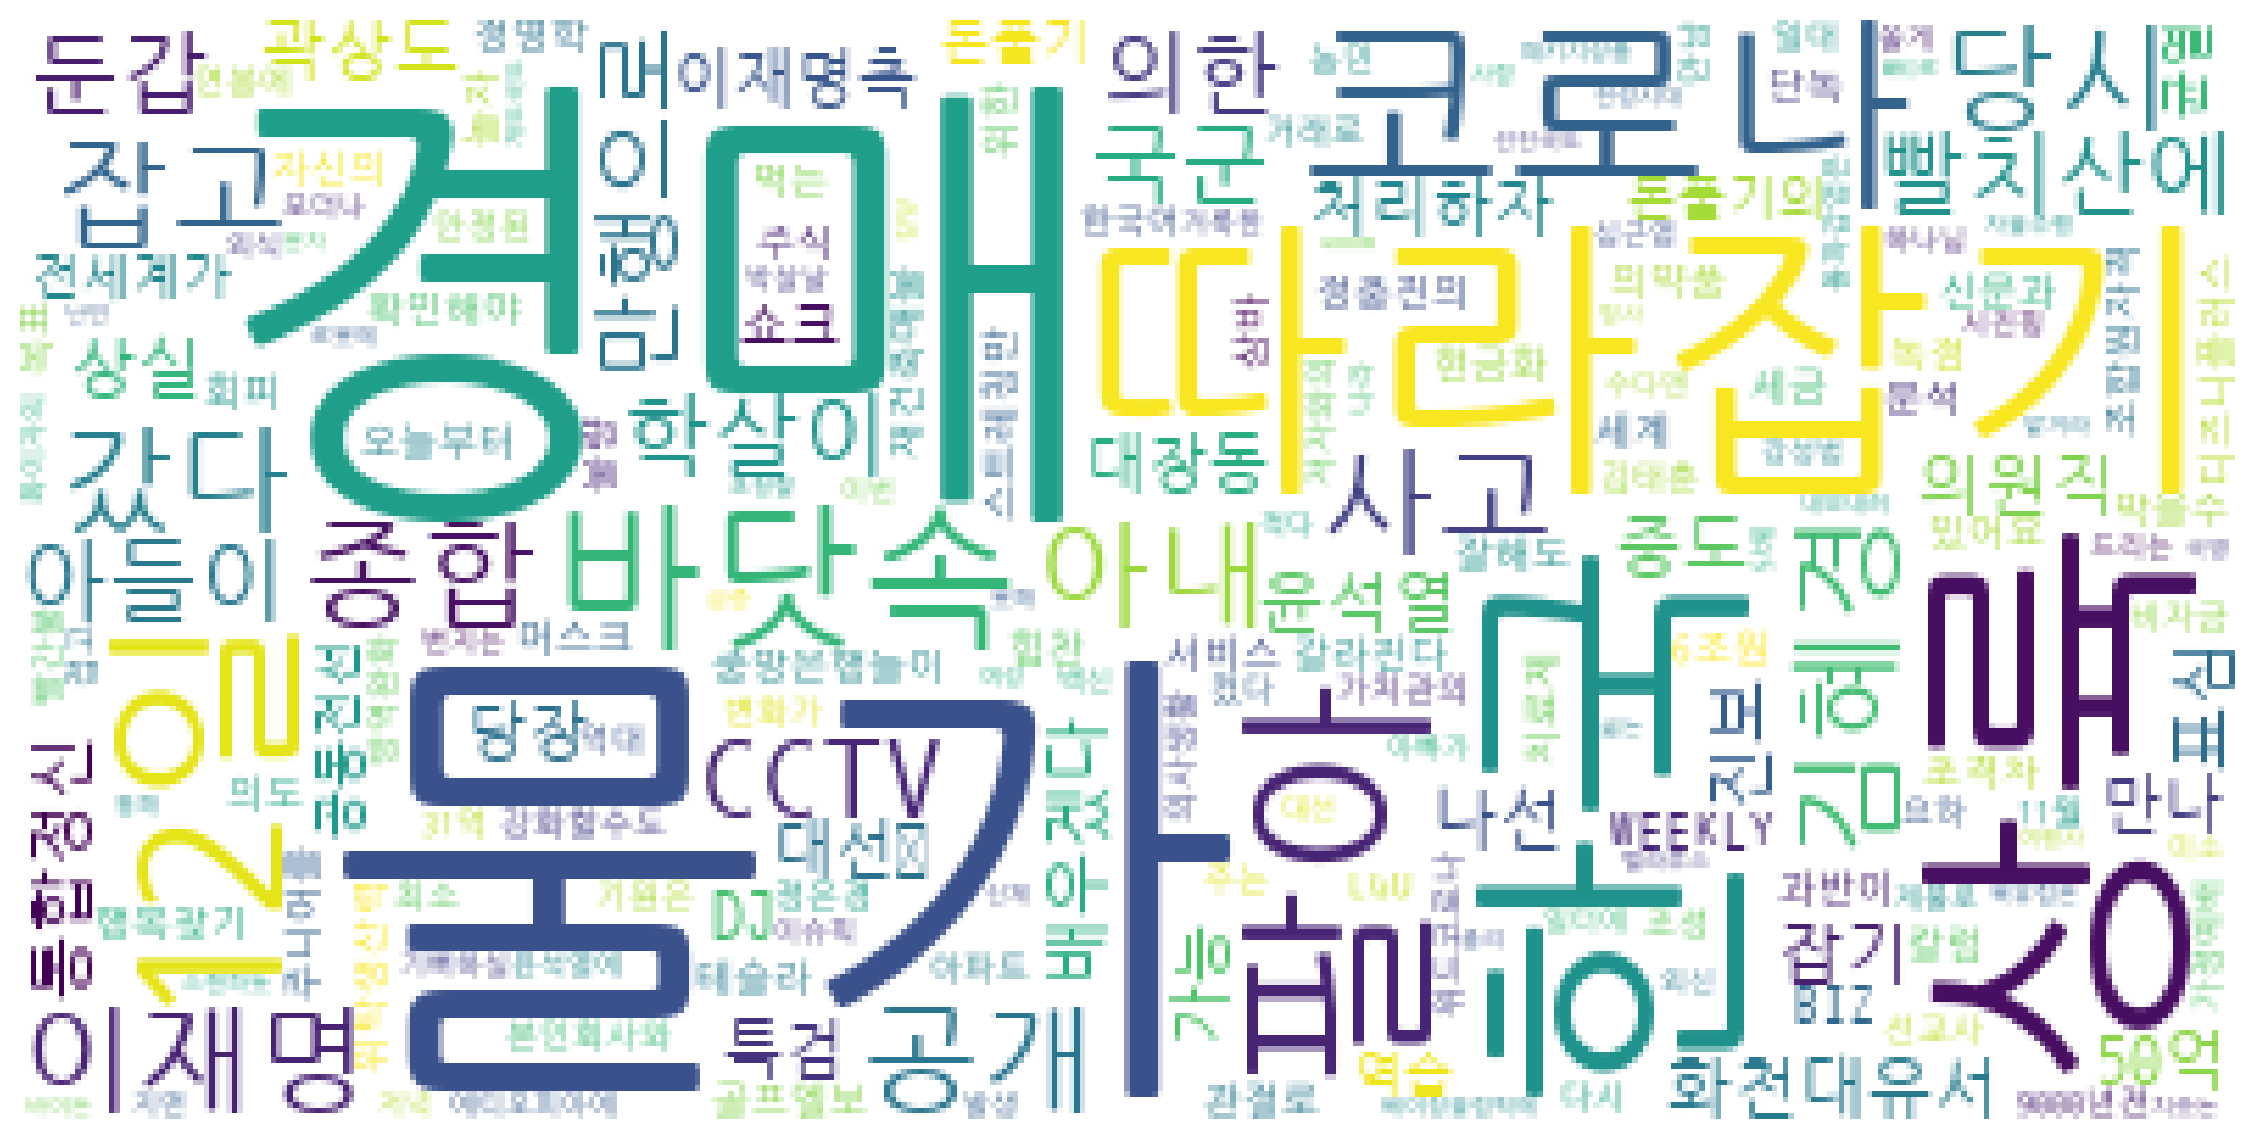

In [ ]:
# 데이터를 수집할 url 주소
url = 'https://news.naver.com'
# BeautifulSoup를 이용해 html 파싱 하기
soup = bs(ur.urlopen(url).read(), 'html.parser')
# 최종 출력을 위한 리스트 생성
title_list = []
# 뉴스기사 제목을 가져올 수 있는 태그를 이용해서 처리 후 리스트에 넣어주기
for i in soup.select('.mlist2.no_bg'):
    a = i.select('a')
    for j in a:
        title = j.text.strip()
        print(title)
        title_list.append(title)

# 리스트를 문자열로 바꿔주기
title = '\n'.join(title_list)

# 워드 클라우드 생성
wordcloud = WordCloud(path, background_color='white' ,colormap='viridis').generate(title)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off') # 축 제거
plt.show()

In [ ]:
def getData(keyword, num):
    # 반복1 (기사번호 변경시키면서 데이터 수집 반복)
    title_list=[]
    source_list=[]
    link_list=[]
    for n in range(1, num, 10):
        raw = requests.get(f'https://search.naver.com/search.naver?where=news&query={keyword}&start=' + str(n), headers={'User-Agent':'Mozilla/5.0'})
        html = bs(raw.text, 'html.parser')
        # 컨테이너 가져오기
        articles = html.select('ul.list_news > li')
        # 반복2 ( 세부 정보 수집(제목/언론사)
        for item in articles:
            title = item.select_one('a.news_tit').text
            source = item.select_one('a.info.press').text.replace('언론사 선정', '')
            link = item.select_one('a.news_tit').attrs['href']
            title_list.append(title)
            source_list.append(source)
            link_list.append(link)
    return title_list, source_list, link_list

검색어를 입력해주세요 : 요소수
뉴스기사 데이터를 수집할 갯수를 입력해주세요(1페이지=10개) : 100


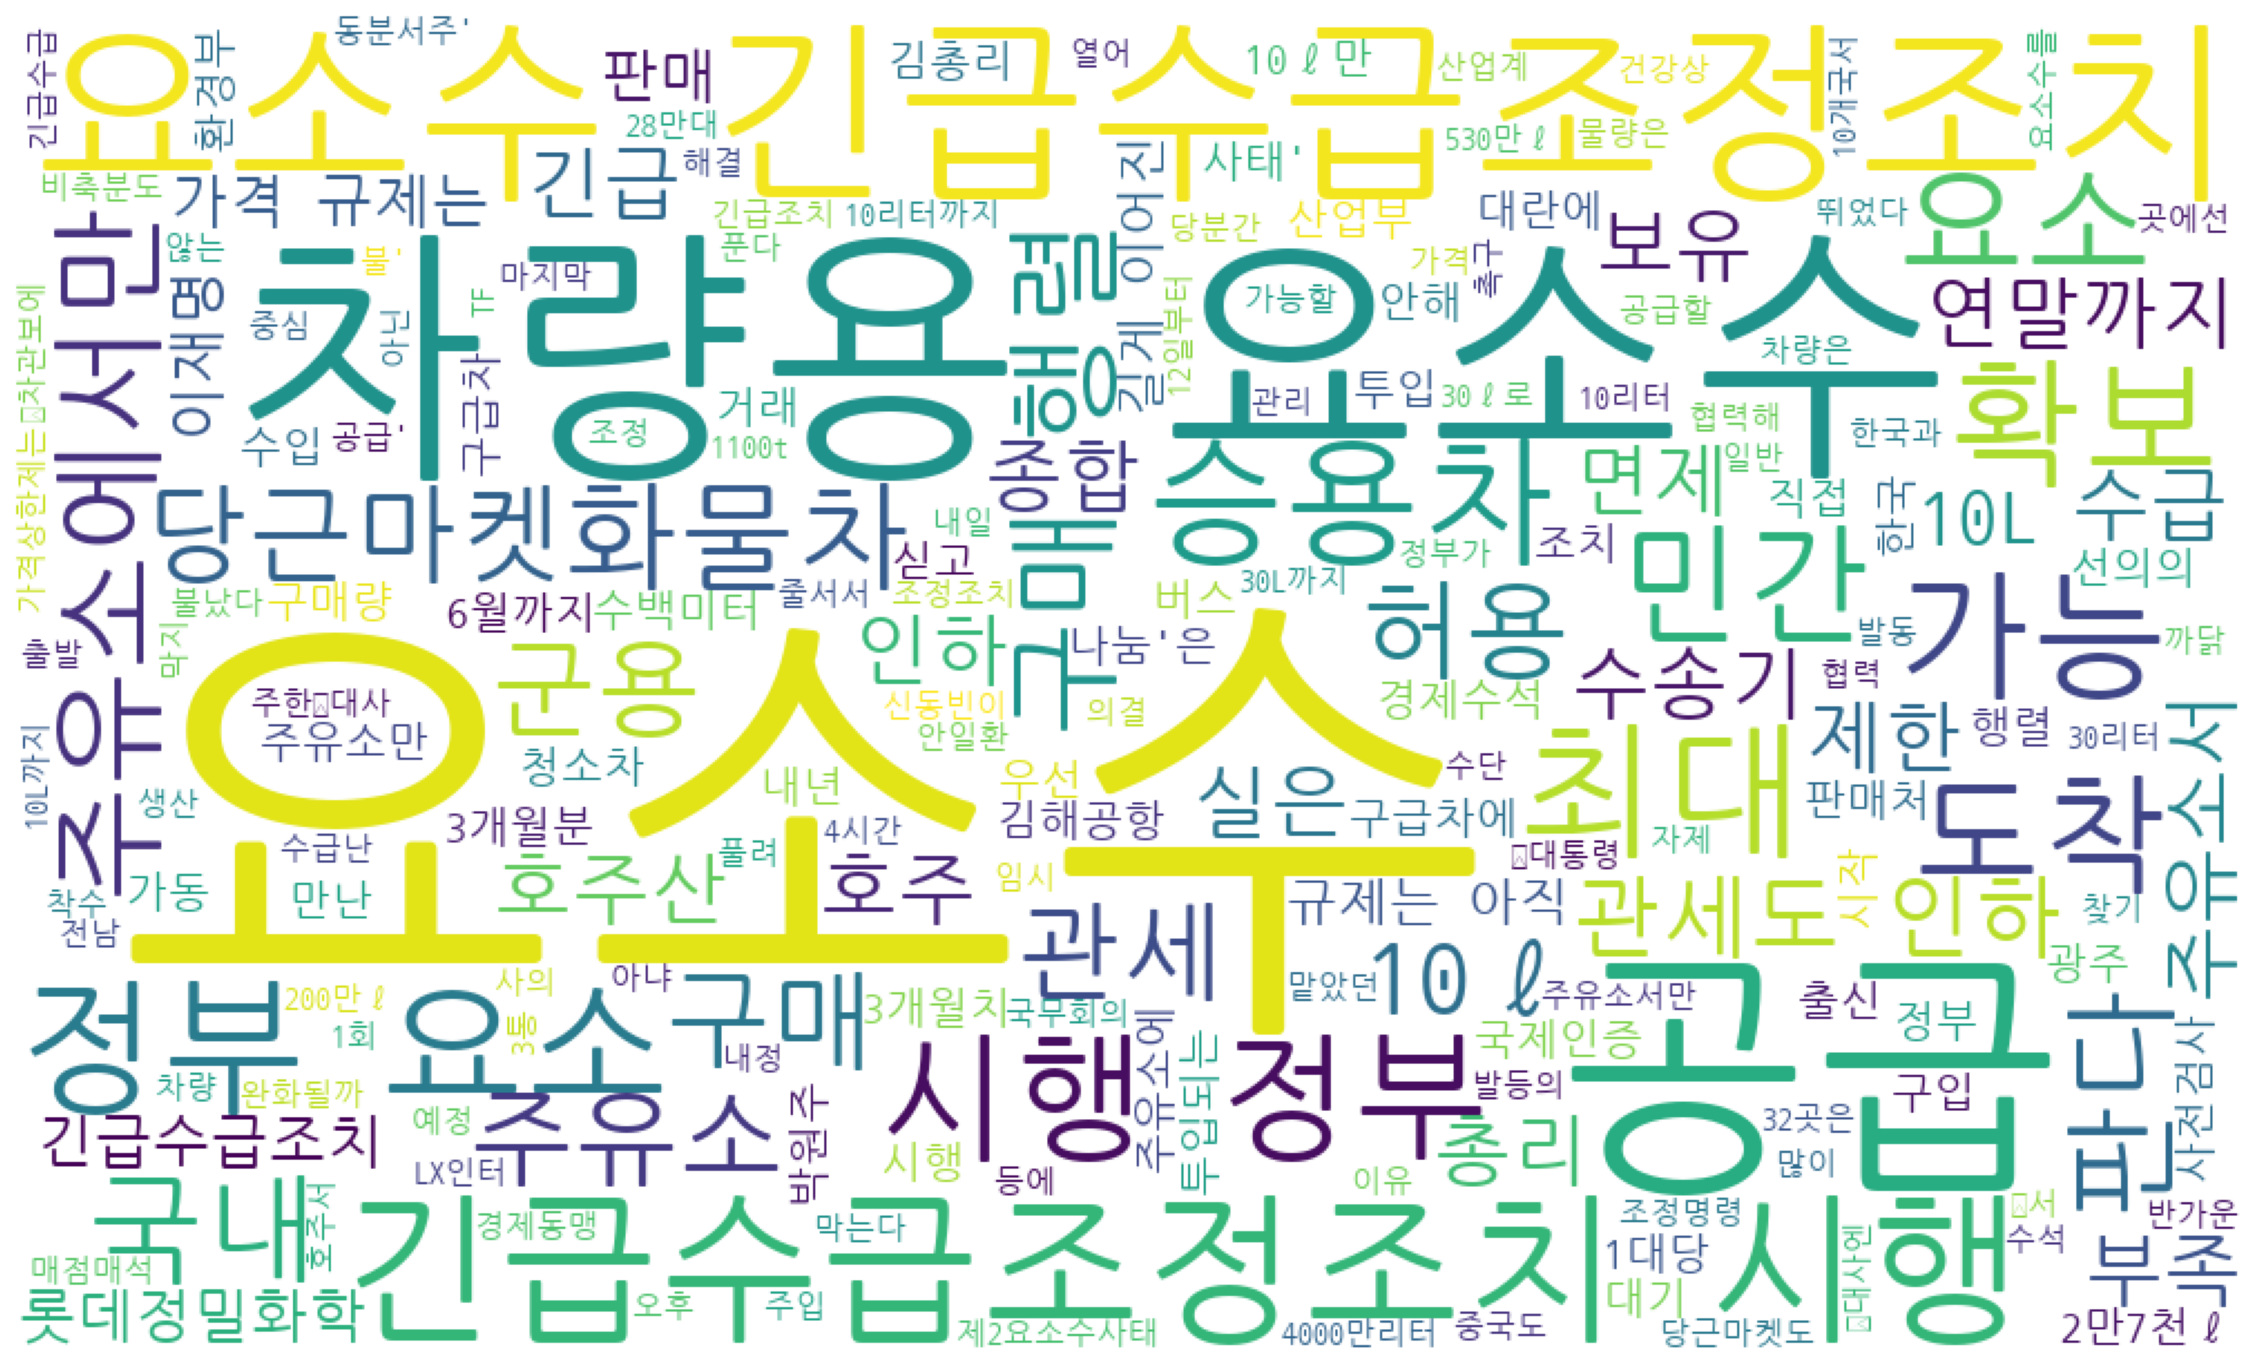

In [7]:
keyword = input('검색어를 입력해주세요 : ')
num = int(input('뉴스기사 데이터를 수집할 갯수를 입력해주세요(1페이지=10개) : '))
title_list, source_list, link_list = getData(keyword,num)

# 리스트를 문자열로 변환
title = '\n'.join(title_list)

# 워드클라우드 생성
wc = WordCloud(width=1000, height=600, background_color='white', font_path=(path)).generate(title)
plt.figure(figsize=(20,15))
plt.imshow(wc)
plt.axis('off')
plt.show()

# 데이터프레임으로 만들고 csv파일로 저장
# 리스트를 딕셔너리로 만들어주기
data = {
    '제목' : title_list,
    '언론사' : source_list,
    'url' : link_list
}
# 딕셔너리를 DataFrame으로 변경
df = pd.DataFrame(data)

# csv파일로 저장
df.to_csv('naver_news_crawling.csv', encoding='euc-kr', index = False)